In [134]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [394]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# CWD file path
import os

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import LabelEncoder #for train test splitting
from sklearn.model_selection import train_test_split #for decision tree object
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  #for visualizing tree 
from sklearn.naive_bayes import GaussianNB

#from sklearn.tree import plot_tree
from sklearn import datasets
from sklearn import tree
from sklearn import metrics

import graphviz 
from graphviz import Source
#from sklearn import tree

In [114]:
cd = os.getcwd()

In [8]:
cd

'C:\\Users\\pkala'

In [9]:
Titanic_data = pd.read_csv(cd+"/Titanic Data.csv")

In [11]:
Titanic_data.survived

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: int64

In [12]:
Titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Row        1309 non-null   int64  
 1   pclass     1309 non-null   int64  
 2   survived   1309 non-null   int64  
 3   name       1309 non-null   object 
 4   sex        1309 non-null   object 
 5   age        1046 non-null   float64
 6   sibsp      1309 non-null   int64  
 7   parch      1309 non-null   int64  
 8   ticket     1309 non-null   object 
 9   fare       1308 non-null   float64
 10  cabin      295 non-null    object 
 11  embarked   1307 non-null   object 
 12  home.dest  745 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 133.1+ KB


In [13]:
Titanic_data.head()

,Row,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,"St Louis, MO"
1,2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,3,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"


In [14]:
Titanic_data.describe()

,Row,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,378.020061,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,328.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [15]:
Titanic_data.head(10)

,Row,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,"St Louis, MO"
1,2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,3,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
5,6,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,"New York, NY"
6,7,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,"Hudson, NY"
7,8,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,"Belfast, NI"
8,9,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,"Bayside, Queens, NY"
9,10,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,"Montevideo, Uruguay"


In [299]:
total = Titanic_data.isnull().sum().sort_values(ascending=False) # Check missing values

In [300]:
total

cabin        1014
home.dest     564
age           263
embarked        2
fare            1
ticket          0
parch           0
sibsp           0
sex             0
name            0
survived        0
pclass          0
Row             0
dtype: int64

In [301]:
Titanic_data.columns.values

array(['Row', 'pclass', 'survived', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'home.dest'],
      dtype=object)

In [302]:
Titanic_data_Cleaned = Titanic_data.copy()

In [303]:
data = [Titanic_data_Cleaned]

In [341]:
ports = {"S": 0, "C": 1, "Q": 2} # Convert embarked
for dataset in data:
    dataset['embarked'] = dataset['embarked'].map(ports)

In [343]:
# Remove all NULLS in the Embarked column
for dataset in data:
    dataset['embarked'] = dataset['embarked'].fillna('S');
   

In [344]:
data

[       Row  pclass  survived                                             name  \
 0        1       1         1                    Allen, Miss. Elisabeth Walton   
 1        2       1         1                   Allison, Master. Hudson Trevor   
 2        3       1         0                     Allison, Miss. Helen Loraine   
 3        4       1         0             Allison, Mr. Hudson Joshua Creighton   
 4        5       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
 ...    ...     ...       ...                                              ...   
 1304  1305       3         0                             Zabour, Miss. Hileni   
 1305  1306       3         0                            Zabour, Miss. Thamine   
 1306  1307       3         0                        Zakarian, Mr. Mapriededer   
 1307  1308       3         0                              Zakarian, Mr. Ortin   
 1308  1309       3         0                               Zimmerman, Mr. Leo   
 
       sex  ag

In [304]:
genders = {"male": 0, "female": 1}  # Convert Sex
for dataset in data:
    dataset['sex'] = dataset['sex'].map(genders)

In [308]:
# Remove all NULLS in the Fare column
for dataset in data:
    dataset['fare'] = dataset['fare'].fillna(Titanic_data_Cleaned['fare'].median())

In [311]:
for dataset in data: # Mapping Age
    dataset.loc[ dataset['fare'] <= 7.91, 'fare']  = 0
    dataset.loc[(dataset['fare'] > 7.91) & (dataset['fare'] <= 14.454), 'fare'] = 1
    dataset.loc[(dataset['fare'] > 14.454) & (dataset['fare'] <= 31), 'fare']   = 2
    dataset.loc[ dataset['fare'] > 31, 'Fare']       = 3
   

In [324]:
 dataset['fare'] = dataset['fare'].astype(int)

In [306]:
# Remove all NULLS in the Age column
for dataset in data:
    age_avg = dataset['age'].mean()
    age_std = dataset['age'].std()
    age_null_count = dataset['age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
   # Next line has been improved to avoid warning
    dataset.loc[np.isnan(dataset['age']), 'age'] = age_null_random_list
    dataset['age'] = dataset['age'].astype(int)

In [309]:
   for dataset in data: # Mapping Age
    dataset.loc[ dataset['age'] <= 16, 'age']   = 0
    dataset.loc[(dataset['age'] > 16) & (dataset['age'] <= 32), 'age'] = 1
    dataset.loc[(dataset['age'] > 32) & (dataset['age'] <= 48), 'age'] = 2
    dataset.loc[(dataset['age'] > 48) & (dataset['age'] <= 64), 'age'] = 3
    dataset.loc[ dataset['age'] > 64, 'age'] 

In [345]:
total = Titanic_data_Cleaned.isnull().sum().sort_values(ascending=False) # Check missing values
total

cabin        1014
Fare          979
home.dest     564
embarked        0
fare            0
ticket          0
parch           0
sibsp           0
age             0
sex             0
name            0
survived        0
pclass          0
Row             0
dtype: int64

In [353]:
titanic_train = Titanic_data_Cleaned.drop(['name','home.dest','cabin','ticket','Row', 'Fare','parch', 'sibsp','embarked'], axis=1) # drop missing values

In [354]:
total = titanic_train.isnull().sum().sort_values(ascending=False) # Check missing values
total

fare        0
age         0
sex         0
survived    0
pclass      0
dtype: int64

In [355]:
Titanic_data_Cleaned.head(10)
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   pclass    1309 non-null   int64
 1   survived  1309 non-null   int64
 2   sex       1309 non-null   int64
 3   age       1309 non-null   int32
 4   fare      1309 non-null   int32
dtypes: int32(2), int64(3)
memory usage: 41.0 KB


In [356]:
X = titanic_train.drop("survived", axis=1)
X

,pclass,sex,age,fare
0,1,1,1,211
1,1,0,0,151
2,1,1,0,151
3,1,0,1,151
4,1,1,1,151
...,...,...,...,...
1304,3,1,0,2
1305,3,1,2,2
1306,3,0,1,0
1307,3,0,1,0


In [357]:
Y = titanic_train["survived"]
Y

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: int64

Training split input-  (916, 4)
Testing split input-  (393, 4)


In [428]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Splitting the data - 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X , Y, test_size=0.3, random_state=0)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

# Defining the decision tree algorithm
de_tree=DecisionTreeClassifier(max_depth = 3)
de_tree.fit(X_train,y_train)

# Predicting the values of test data
y_pred = de_tree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))
print('Accuracy of decision tree classifier Titanic data: {:.2f}'.format(round(de_tree.score(X_test, y_test) * 100, 2)))

Training split input-  (916, 4)
Testing split input-  (393, 4)
Classification report - 
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       246
           1       0.75      0.66      0.70       147

    accuracy                           0.79       393
   macro avg       0.78      0.76      0.77       393
weighted avg       0.79      0.79      0.79       393

Accuracy of decision tree classifier Titanic data: 78.88


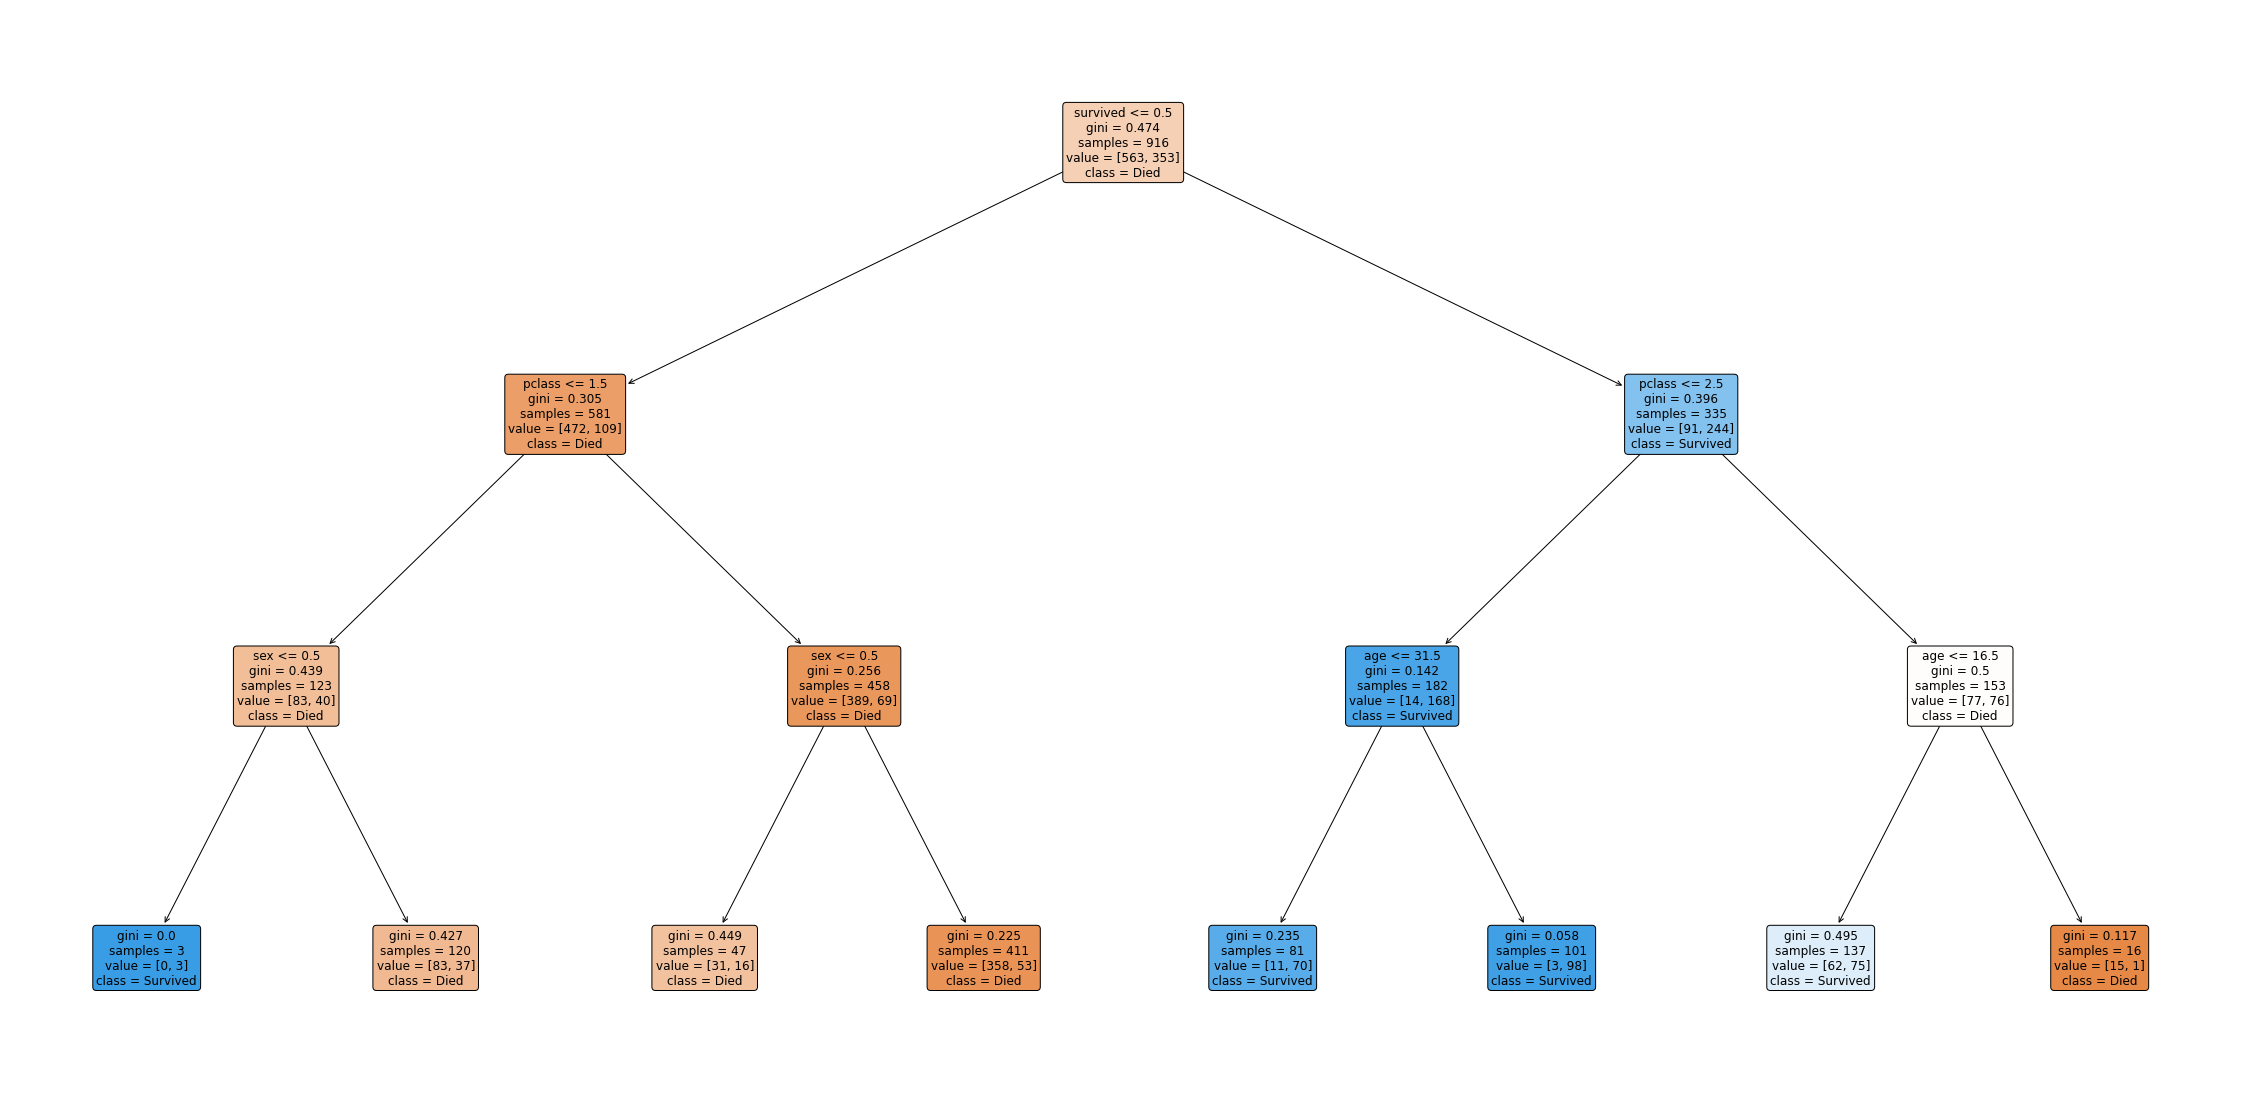

In [382]:
plt.figure(figsize=(40,20))  
_ = plot_tree(decision_tree=de_tree, 
              feature_names = titanic_train.columns ,
              class_names = ['Died', 'Survived'],
             filled=True, 
              fontsize=12,              
              rounded = True)
plt.savefig('TitanicDecisionTree.png')
plt.show()

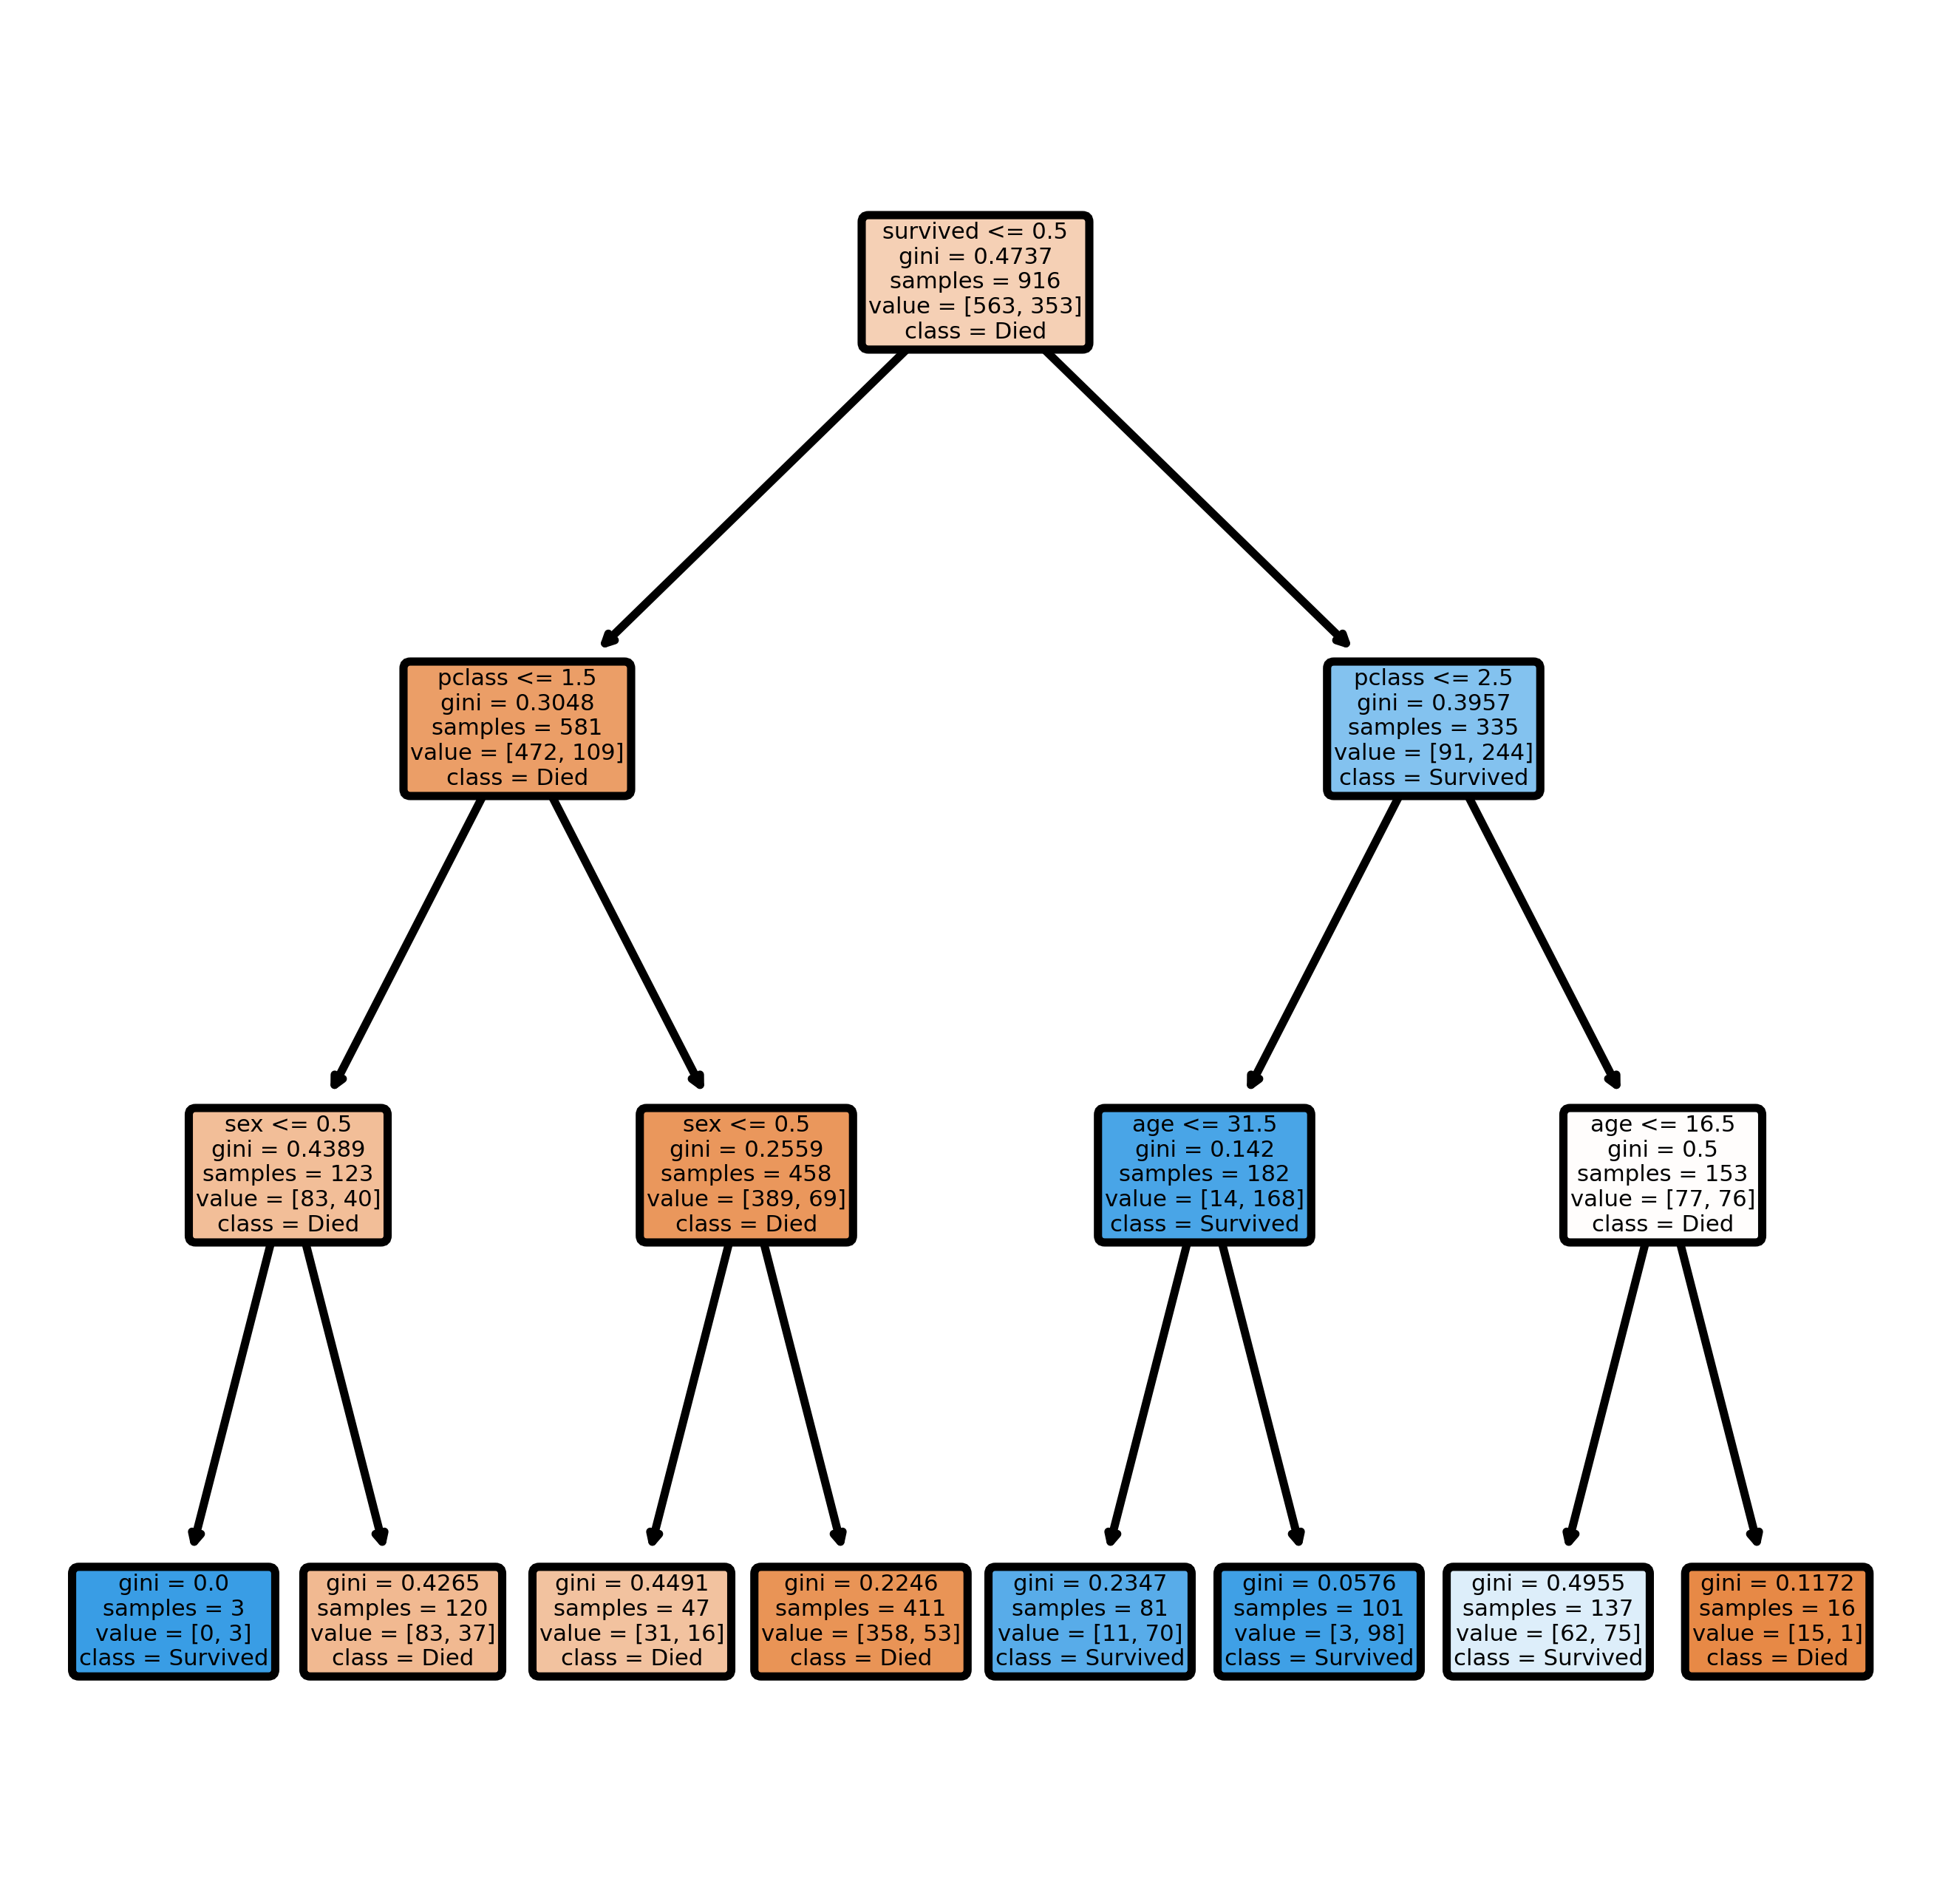

In [383]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
dec_tree = plot_tree(decision_tree=de_tree,
                     feature_names=titanic_train.columns,
                     class_names = ['Died', 'Survived'],
                     filled = True , 
                     precision = 4, 
                     rounded = True);

plt.savefig('TitanicDecisionTree.png')
plt.show()


In [423]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Splitting the data - 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X , Y, test_size=0.3, random_state=0)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

NaiveBayesClassifier= GaussianNB()
NaiveBayesClassifier.fit(X_train, y_train)
NaiveBayesClassifier.class_prior_

Training split input-  (916, 4)
Testing split input-  (393, 4)


array([0.61462882, 0.38537118])

In [425]:
Y_Pred=NaiveBayesClassifier.predict(X_test)
print("Classification report - \n", classification_report(y_test,Y_Pred))
print('Accuracy of Naive Bayes classifier on Titanic Data: {:.2f}'.format(round(NaiveBayesClassifier.score(X_test, y_test) * 100, 2)))

Classification report - 
               precision    recall  f1-score   support

           0       0.83      0.70      0.76       246
           1       0.60      0.77      0.67       147

    accuracy                           0.72       393
   macro avg       0.72      0.73      0.72       393
weighted avg       0.75      0.72      0.73       393

Accuracy of Naive Bayes classifier on Titanic Data: 72.26


In [426]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Splitting the data - 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X , Y, test_size=0.3, random_state=0)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

LogisticRegression_Model = LogisticRegression()
LogisticRegression_Model.fit(X_train, y_train)

Training split input-  (916, 4)
Testing split input-  (393, 4)


LogisticRegression()

In [427]:
Y_Pred=LogisticRegression_Model.predict(X_test);
print(classification_report(y_test, Y_Pred))
print('Accuracy of Logistic Regression Model on Titanic Data: {:.2f}'.format(round(LogisticRegression_Model.score(X_test, y_test) * 100, 2)));

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       246
           1       0.76      0.63      0.69       147

    accuracy                           0.79       393
   macro avg       0.78      0.76      0.76       393
weighted avg       0.78      0.79      0.78       393

Accuracy of Logistic Regression Model on Titanic Data: 78.63
